<a href="https://colab.research.google.com/github/SAZA-KARTIAN/Data-Science/blob/main/Colab_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#Importar y definir base de datos
data = pd.read_excel("./DataFF.xlsx")
data.head()

,Año,IdAccidente,SubID,Fecha,Día de la Semana,Hora,Región,Comuna,Tipo Accidente,Tipo (CONASET),...,Clasificación PNDR,Rango de Hora,Tasa noche,Tasa mañana,Tasa tarde,Momento del Día,Tasa Viales (por km²),Tasa Situacionales (por km²),Superficie (km²),Tasa de Delito
0,2014,701256,701256.1,2014-01-01,Miércoles,23:30:00,REGION METROPOLITANA,PEÑAFLOR,COLISION POR ALCANCE,COLISION,...,Urbana,23:00-23:59,3619.860608,2765.141283,4556.702145,Noche,0.589928,1.280576,69.5,3619.860608
1,2014,702116,702116.1,2014-01-02,Jueves,07:50:00,REGION METROPOLITANA,ÑUÑOA,COLISION LATERAL,COLISION,...,Urbana,07:00-07:59,3557.484981,3061.895821,4889.620961,Mañana,6.390533,5.680473,16.9,3061.895821
2,2014,707738,707738.1,2014-01-02,Jueves,14:30:00,REGION METROPOLITANA,PUENTE ALTO,COLISION,COLISION,...,Urbana,14:00-14:59,1895.244901,1759.002721,2509.918924,Tarde,3.253968,5.158730,88.2,2509.918924
3,2014,702182,702182.1,2014-01-03,Viernes,11:15:00,REGION METROPOLITANA,QUINTA NORMAL,CHOQUE FRENTE/POSTERIOR,CHOQUE,...,Urbana,11:00-11:59,5158.780652,4480.759093,6556.632069,Mañana,14.516129,26.290323,12.4,4480.759093
4,2014,702185,702185.1,2014-01-03,Viernes,14:00:00,REGION METROPOLITANA,QUINTA NORMAL,COLISION PERPENDICULAR,COLISION,...,Urbana,14:00-14:59,5158.780652,4480.759093,6556.632069,Tarde,14.516129,26.290323,12.4,6556.632069


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13033 entries, 0 to 13032
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Año                             13033 non-null  int64         
 1   IdAccidente                     13033 non-null  int64         
 2   SubID                           13033 non-null  float64       
 3   Fecha                           13033 non-null  datetime64[ns]
 4   Día de la Semana                13033 non-null  object        
 5   Hora                            13033 non-null  object        
 6   Región                          13033 non-null  object        
 7   Comuna                          13033 non-null  object        
 8   Tipo Accidente                  13033 non-null  object        
 9   Tipo (CONASET)                  13033 non-null  object        
 10  Zona                            13033 non-null  object        
 11  Ub

In [5]:
data["Gravedad de la Lesión Numérica"].value_counts()
#Se puede observar un desbalanceo en las respuestas, esto se analizará bajo el criterio de ponderación por clases

,count
Gravedad de la Lesión Numérica,
1,7003
0,2804
3,2095
2,860
4,271


In [6]:
(data["Gravedad de la Lesión Numérica"].value_counts(normalize=True)
 .mul(100)
 .round(2)  # Redondea a 2 decimales
 .astype(str) + '%')

,proportion
Gravedad de la Lesión Numérica,
1,53.73%
0,21.51%
3,16.07%
2,6.6%
4,2.08%


In [7]:
data[["Tipo (CONASET)", "Gravedad de la Lesión Numérica"]].value_counts().sort_index() #Conteo cruzado

Tipo (CONASET)  Gravedad de la Lesión Numérica
ATROPELLO       0                                  211
                1                                  100
                2                                    3
                3                                   16
CAIDA           0                                    6
                1                                   24
                2                                    5
                3                                    6
CHOQUE          0                                  259
                1                                  381
                2                                   40
                3                                   98
                4                                    7
COLISION        0                                 2131
                1                                 5930
                2                                  737
                3                                 1772
                4                                  256
OTRO TIPO       0                                   40
                1                                  112
                2                                   12
                3                                   38
                4                                    3
VOLCADURA       0                                  157
                1                                  456
                2                                   63
                3                                  165
                4                                    5
Name: count, dtype: int64

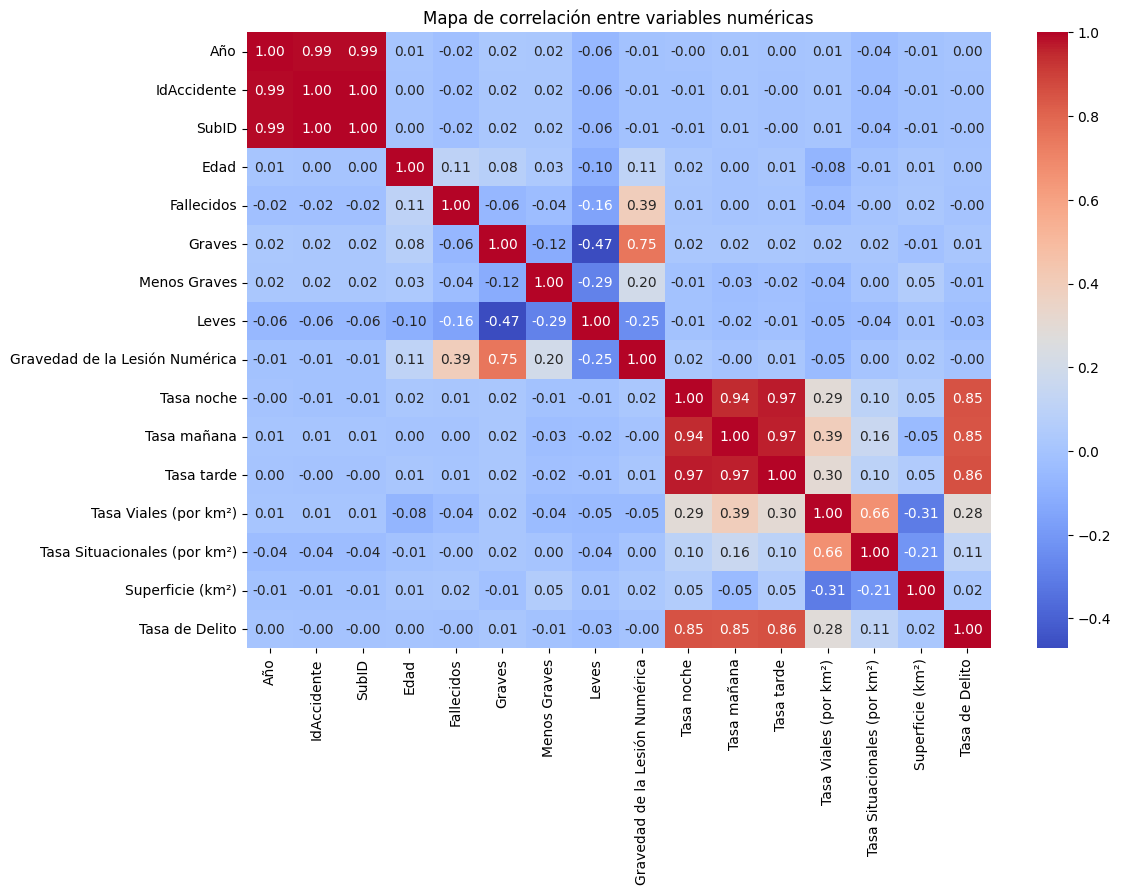

In [8]:
numeric_data = data.select_dtypes(include=['number'])

# Crear un gráfico de correlación
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()

# Usar un mapa de calor para visualizar las correlaciones
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de correlación entre variables numéricas")
plt.show()

**Entrenamiento y Testeo**

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13033 entries, 0 to 13032
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Año                             13033 non-null  int64         
 1   IdAccidente                     13033 non-null  int64         
 2   SubID                           13033 non-null  float64       
 3   Fecha                           13033 non-null  datetime64[ns]
 4   Día de la Semana                13033 non-null  object        
 5   Hora                            13033 non-null  object        
 6   Región                          13033 non-null  object        
 7   Comuna                          13033 non-null  object        
 8   Tipo Accidente                  13033 non-null  object        
 9   Tipo (CONASET)                  13033 non-null  object        
 10  Zona                            13033 non-null  object        
 11  Ub

In [12]:
from sklearn.model_selection import train_test_split

X = data.drop(["Gravedad de la Lesión Numérica","Clasificación PNDR","Región","Tipo","IdAccidente","SubID","Fecha","Hora","Mes","Año","Tipo Accidente","Zona","Causa Accidente","Calidad","Fallecidos","Graves","Menos Graves","Leves","Gravedad de la lesión", "Rango de Hora", "Tasa tarde", "Tasa mañana", "Tasa noche"], axis=1)
y = data["Gravedad de la Lesión Numérica"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9123, 12)
(3910, 12)
(9123,)
(3910,)


In [13]:
X_train.head()

,Día de la Semana,Comuna,Tipo (CONASET),Ubicación Relativa,Causa (CONASET),Sexo,Edad,Momento del Día,Tasa Viales (por km²),Tasa Situacionales (por km²),Superficie (km²),Tasa de Delito
7403,Martes,PROVIDENCIA,VOLCADURA,TRAMO DE VIA RECTA,IMPRUDENCIA DEL CONDUCTOR,MASCULINO,23.0,Mañana,7.986111,6.041667,14.4,5491.311172
8236,Lunes,PROVIDENCIA,COLISION,CRUCE CON SEMAFORO FUNCIONANDO,IMPRUDENCIA DEL CONDUCTOR,MASCULINO,32.0,Noche,7.986111,6.041667,14.4,6176.141442
3682,Miércoles,COLINA,COLISION,CRUCE SIN SEÑALIZACIÓN,CAUSAS NO DETERMINADAS,MASCULINO,5.0,Tarde,0.003006,0.002004,1996.1,4311.011101
5842,Jueves,MAIPU,COLISION,CRUCE CON SEMAFORO FUNCIONANDO,DESOBEDIENCIA A SEÑALIZACION,FEMENINO,43.0,Noche,1.541353,2.052632,133.0,1852.281419
1726,Martes,PUENTE ALTO,COLISION,OTROS NO CONSIDERADOS,IMPRUDENCIA DEL CONDUCTOR,MASCULINO,25.0,Mañana,3.253968,5.158730,88.2,1759.002721


In [14]:
X_train.select_dtypes("object").columns

Index(['Día de la Semana', 'Comuna', 'Tipo (CONASET)', 'Ubicación Relativa',
       'Causa (CONASET)', 'Sexo', 'Momento del Día'],
      dtype='object')

In [15]:
#Pasar a númerico

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

categoricas = ['Día de la Semana', 'Comuna', 'Tipo (CONASET)', 'Ubicación Relativa',
       'Causa (CONASET)', 'Sexo', 'Momento del Día']

ohe = OneHotEncoder(sparse_output=False, drop = "first", handle_unknown="ignore")

X_train_cat_ohe = ohe.fit_transform(X_train[categoricas])
X_train_cat_ohe

array([[0., 0., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [16]:
ohe.get_feature_names_out()

array(['Día de la Semana_Jueves', 'Día de la Semana_Lunes',
       'Día de la Semana_Martes', 'Día de la Semana_Miércoles',
       'Día de la Semana_Sábado', 'Día de la Semana_Viernes',
       'Comuna_BUIN', 'Comuna_CALERA DE TANGO', 'Comuna_CERRILLOS',
       'Comuna_CERRO NAVIA', 'Comuna_COLINA', 'Comuna_CONCHALI',
       'Comuna_CURACAVI', 'Comuna_EL BOSQUE', 'Comuna_EL MONTE',
       'Comuna_ESTACION CENTRAL', 'Comuna_HUECHURABA',
       'Comuna_INDEPENDENCIA', 'Comuna_ISLA DE MAIPO',
       'Comuna_LA CISTERNA', 'Comuna_LA FLORIDA', 'Comuna_LA GRANJA',
       'Comuna_LA PINTANA', 'Comuna_LA REINA', 'Comuna_LAMPA',
       'Comuna_LAS CONDES', 'Comuna_LO BARNECHEA', 'Comuna_LO ESPEJO',
       'Comuna_LO PRADO', 'Comuna_MACUL', 'Comuna_MAIPU',
       'Comuna_MARIA PINTO', 'Comuna_MELIPILLA', 'Comuna_PADRE HURTADO',
       'Comuna_PAINE', 'Comuna_PEDRO AGUIRRE CERDA', 'Comuna_PEÑAFLOR',
       'Comuna_PEÑALOLEN', 'Comuna_PIRQUE', 'Comuna_PROVIDENCIA',
       'Comuna_PUDAHUEL', 'Comuna

In [17]:
X_train_prep = pd.concat([
                          X_train.drop(categoricas, axis = 1).reset_index(drop=True),
                          pd.DataFrame(X_train_cat_ohe, columns=ohe.get_feature_names_out())
                          ], axis=1)
X_train_prep.head()

,Edad,Tasa Viales (por km²),Tasa Situacionales (por km²),Superficie (km²),Tasa de Delito,Día de la Semana_Jueves,Día de la Semana_Lunes,Día de la Semana_Martes,Día de la Semana_Miércoles,Día de la Semana_Sábado,...,Causa (CONASET)_FALLAS MECANICAS,Causa (CONASET)_IMPRUDENCIA DEL CONDUCTOR,Causa (CONASET)_IMPRUDENCIA DEL PASAJERO,Causa (CONASET)_IMPRUDENCIA DEL PEATON,Causa (CONASET)_OTRAS CAUSAS,Causa (CONASET)_PERDIDA CONTROL VEHICULO,Causa (CONASET)_VELOCIDAD IMPRUDENTE,Sexo_MASCULINO,Momento del Día_Noche,Momento del Día_Tarde
0,23.0,7.986111,6.041667,14.4,5491.311172,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,32.0,7.986111,6.041667,14.4,6176.141442,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,5.0,0.003006,0.002004,1996.1,4311.011101,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,43.0,1.541353,2.052632,133.0,1852.281419,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,25.0,3.253968,5.158730,88.2,1759.002721,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [18]:
#ahora hay que setear la data de testeo
X_test_cat_ohe = ohe.transform(X_test[categoricas]) #Selecciono variables categóricas
X_test_cat_ohe

array([[1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 1., 0., ..., 1., 1., 0.]])

In [19]:
X_test_prep = pd.concat([
    X_test.drop(categoricas, axis=1).reset_index(drop=True), #elimino variables que voy a reemplazar
    pd.DataFrame(X_test_cat_ohe, columns = ohe.get_feature_names_out())
], axis=1)
X_test_prep.head()

,Edad,Tasa Viales (por km²),Tasa Situacionales (por km²),Superficie (km²),Tasa de Delito,Día de la Semana_Jueves,Día de la Semana_Lunes,Día de la Semana_Martes,Día de la Semana_Miércoles,Día de la Semana_Sábado,...,Causa (CONASET)_FALLAS MECANICAS,Causa (CONASET)_IMPRUDENCIA DEL CONDUCTOR,Causa (CONASET)_IMPRUDENCIA DEL PASAJERO,Causa (CONASET)_IMPRUDENCIA DEL PEATON,Causa (CONASET)_OTRAS CAUSAS,Causa (CONASET)_PERDIDA CONTROL VEHICULO,Causa (CONASET)_VELOCIDAD IMPRUDENTE,Sexo_MASCULINO,Momento del Día_Noche,Momento del Día_Tarde
0,27.000000,14.516129,26.290323,12.4,5158.780652,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,65.000000,3.253968,5.158730,88.2,2509.918924,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,32.040609,7.986111,6.041667,14.4,8319.315310,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,53.000000,6.390533,5.680473,16.9,3061.895821,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,19.000000,0.093458,0.121495,214.0,5424.348149,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
y_train

,Gravedad de la Lesión Numérica
7403,1
8236,3
3682,2
5842,1
1726,3
...,...
2494,1
2688,1
2656,3
3578,1


In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
np.logspace(-4, 0, 15) #Buscamos entre 0.0001 y 1, creamos 15 valores donde aparecerán números más cercanos a 0.

array([1.00000000e-04, 1.93069773e-04, 3.72759372e-04, 7.19685673e-04,
       1.38949549e-03, 2.68269580e-03, 5.17947468e-03, 1.00000000e-02,
       1.93069773e-02, 3.72759372e-02, 7.19685673e-02, 1.38949549e-01,
       2.68269580e-01, 5.17947468e-01, 1.00000000e+00])

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

hiperparametros = {
    "criterion": ["gini", "entropy"],
    "max_depth": [2, 3, 4, 5, 6],
    "ccp_alpha": np.logspace (-4, 0, 15) # Penalización según cantidad de nodos terminales
}

dt = DecisionTreeClassifier(random_state=2024, class_weight="balanced")

busqueda = GridSearchCV(
    estimator = dt,
    param_grid = hiperparametros,
    scoring = "f1", #F1 es conveniente para casos de desbalance
    cv = 5,
    n_jobs = -1,
    verbose = 1
)
busqueda.fit(X_train_prep, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1107: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=2024),
             n_jobs=-1,
             param_grid={'ccp_alpha': array([1.00000000e-04, 1.93069773e-04, 3.72759372e-04, 7.19685673e-04,
       1.38949549e-03, 2.68269580e-03, 5.17947468e-03, 1.00000000e-02,
       1.93069773e-02, 3.72759372e-02, 7.19685673e-02, 1.38949549e-01,
       2.68269580e-01, 5.17947468e-01, 1.00000000e+00]),
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6]},
             scoring='f1', verbose=1)

In [24]:
pd.DataFrame(busqueda.cv_results_).sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.124653,0.068532,0.026840,0.018712,0.000100,gini,2,"{'ccp_alpha': 0.0001, 'criterion': 'gini', 'ma...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
96,0.121716,0.025469,0.021946,0.006392,0.037276,entropy,3,"{'ccp_alpha': 0.03727593720314938, 'criterion'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
97,0.127160,0.072594,0.021670,0.016277,0.037276,entropy,4,"{'ccp_alpha': 0.03727593720314938, 'criterion'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
98,0.127134,0.098850,0.014663,0.011453,0.037276,entropy,5,"{'ccp_alpha': 0.03727593720314938, 'criterion'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
99,0.140196,0.094850,0.013866,0.009765,0.037276,entropy,6,"{'ccp_alpha': 0.03727593720314938, 'criterion'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,0.136343,0.033206,0.025915,0.010042,0.002683,gini,3,"{'ccp_alpha': 0.0026826957952797246, 'criterio...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
52,0.184499,0.009434,0.024343,0.005183,0.002683,gini,4,"{'ccp_alpha': 0.0026826957952797246, 'criterio...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
53,0.178887,0.053941,0.020571,0.009394,0.002683,gini,5,"{'ccp_alpha': 0.0026826957952797246, 'criterio...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
55,0.131151,0.030106,0.024100,0.008742,0.002683,entropy,2,"{'ccp_alpha': 0.0026826957952797246, 'criterio...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [25]:
mejor_modelo = busqueda.best_estimator_
mejor_modelo.fit(X_train_prep, y_train)

DecisionTreeClassifier(ccp_alpha=0.0001, class_weight='balanced', max_depth=2,
                       random_state=2024)

In [26]:
from sklearn.metrics import classification_report

y_pred = mejor_modelo.predict(X_test_prep)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.29      0.21      0.25       843
           1       0.56      0.75      0.64      2131
           2       0.00      0.00      0.00       242
           3       0.33      0.03      0.05       609
           4       0.07      0.36      0.12        85

    accuracy                           0.46      3910
   macro avg       0.25      0.27      0.21      3910
weighted avg       0.42      0.46      0.41      3910



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
from sklearn.metrics import classification_report

y_pred_train = mejor_modelo.predict(X_train_prep)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.32      0.23      0.27      1961
           1       0.56      0.76      0.64      4872
           2       0.00      0.00      0.00       618
           3       0.22      0.02      0.03      1486
           4       0.07      0.35      0.12       186

    accuracy                           0.47      9123
   macro avg       0.23      0.27      0.21      9123
weighted avg       0.40      0.47      0.41      9123



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Random Forest**

In [28]:
from sklearn.ensemble import RandomForestClassifier

#Valores inventados, deberíamos buscarlos con validación cruzada
rf = RandomForestClassifier(

    class_weight = "balanced",
    random_state = 2024,
    n_jobs =-1
)
rf.fit(X_train_prep, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=2024)

In [29]:
y_pred = rf.predict(X_test_prep)
print(classification_report(y_test, y_pred)) ###Mejor Modelo###

              precision    recall  f1-score   support

           0       0.32      0.22      0.26       843
           1       0.56      0.79      0.65      2131
           2       0.08      0.02      0.03       242
           3       0.21      0.09      0.12       609
           4       0.17      0.05      0.07        85

    accuracy                           0.49      3910
   macro avg       0.27      0.23      0.23      3910
weighted avg       0.42      0.49      0.44      3910



In [30]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, y_pred)

0.23284923240231312

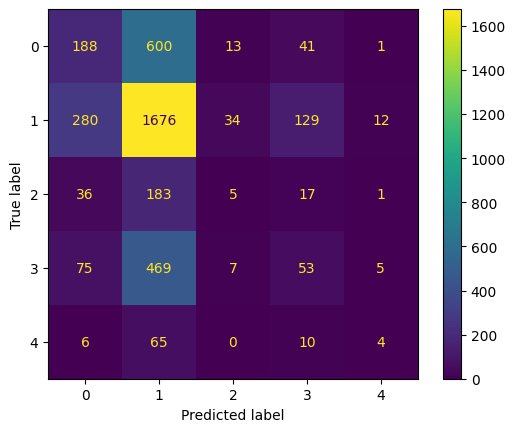

In [31]:
#Matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [32]:
# Crear un DataFrame con la importancia de las características
importancia_pred = pd.DataFrame(
    {'predictor': X_train_prep.columns,
     'importancia': rf.feature_importances_}
).sort_values('importancia', ascending=False).reset_index(drop=True)

# Mostrar las importancias de las características
print(importancia_pred)

                                            predictor  importancia
0                                                Edad     0.226658
1                                      Tasa de Delito     0.067289
2                                    Superficie (km²)     0.043018
3                               Tasa Viales (por km²)     0.041941
4                        Tasa Situacionales (por km²)     0.041133
..                                                ...          ...
96                                      Comuna_TILTIL     0.000181
97   Ubicación Relativa_CRUCE REGULADO POR CARABINERO     0.000160
98                  Causa (CONASET)_ALCOHOL EN PEATON     0.000088
99                  Ubicación Relativa_PLAZA DE PEAJE     0.000088
100                          Ubicación Relativa_TUNEL     0.000061

[101 rows x 2 columns]


In [33]:
from sklearn.ensemble import RandomForestClassifier

hiperparametros = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'class_weight': ['balanced', None]
}

busqueda = GridSearchCV(
    estimator = rf,
    param_grid = hiperparametros,
    scoring = "f1",
    n_jobs = -1,
    cv = 3
)
busqueda.fit(X_train_prep, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1107: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=2024),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [10, 15, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='f1')

In [34]:
pd.DataFrame(busqueda.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.114849,0.956190,0.279139,0.052744,balanced,10,1,2,100,"{'class_weight': 'balanced', 'max_depth': 10, ...",NaN,NaN,NaN,NaN,NaN,1
1,4.627981,1.048085,0.337106,0.071940,balanced,10,1,2,200,"{'class_weight': 'balanced', 'max_depth': 10, ...",NaN,NaN,NaN,NaN,NaN,1
2,1.813372,0.037981,0.196875,0.015001,balanced,10,1,5,100,"{'class_weight': 'balanced', 'max_depth': 10, ...",NaN,NaN,NaN,NaN,NaN,1
3,4.470282,0.934764,0.703628,0.155641,balanced,10,1,5,200,"{'class_weight': 'balanced', 'max_depth': 10, ...",NaN,NaN,NaN,NaN,NaN,1
4,2.562696,0.404832,0.261090,0.049449,balanced,10,1,10,100,"{'class_weight': 'balanced', 'max_depth': 10, ...",NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,4.101331,1.045540,0.319745,0.113820,None,None,5,2,200,"{'class_weight': None, 'max_depth': None, 'min...",NaN,NaN,NaN,NaN,NaN,1
104,1.310463,0.035064,0.127356,0.006062,None,None,5,5,100,"{'class_weight': None, 'max_depth': None, 'min...",NaN,NaN,NaN,NaN,NaN,1
105,2.800243,0.020651,0.271960,0.014985,None,None,5,5,200,"{'class_weight': None, 'max_depth': None, 'min...",NaN,NaN,NaN,NaN,NaN,1
106,1.717584,0.248545,0.239214,0.053780,None,None,5,10,100,"{'class_weight': None, 'max_depth': None, 'min...",NaN,NaN,NaN,NaN,NaN,1


In [35]:
mejor_modelo = busqueda.best_estimator_
mejor_modelo.fit(X_train_prep, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1,
                       random_state=2024)

In [36]:
y_pred = mejor_modelo.predict (X_test_prep)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.35      0.40      0.37       843
           1       0.61      0.46      0.52      2131
           2       0.11      0.18      0.13       242
           3       0.21      0.16      0.18       609
           4       0.10      0.52      0.16        85

    accuracy                           0.38      3910
   macro avg       0.27      0.34      0.27      3910
weighted avg       0.45      0.38      0.41      3910



In [37]:
y_train.value_counts()

,count
Gravedad de la Lesión Numérica,
1,4872
0,1961
3,1486
2,618
4,186


In [38]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, y_pred)

0.3437289336470615

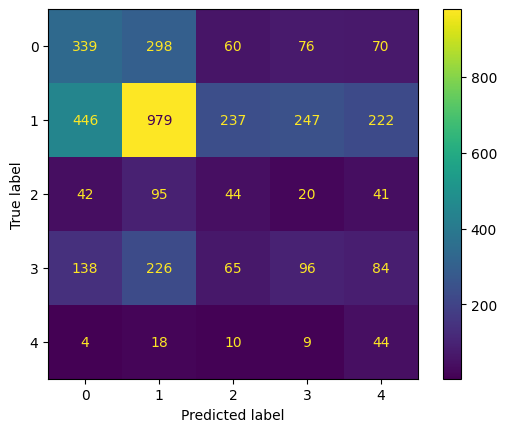

In [39]:
#Matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

<ipython-input-40-36715d09d3ca>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')


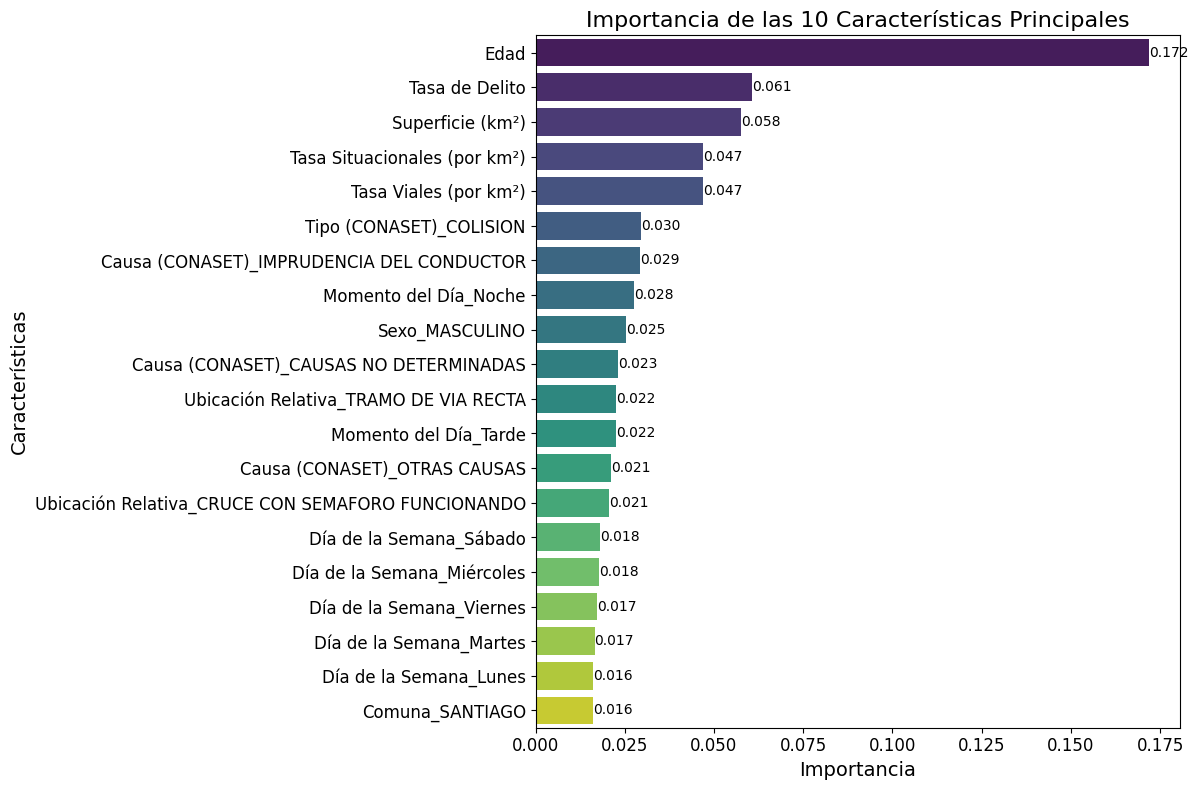

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener importancia de las características
importancias = mejor_modelo.feature_importances_

# Crear un DataFrame con las importancias
importancia_df = pd.DataFrame({
    'Feature': X_train_prep.columns,
    'Importance': importancias
}).sort_values(by='Importance', ascending=False)

# Mostrar solo las 10 características más importantes
top_10_features = importancia_df.head(20)

# Visualizar las importancias
plt.figure(figsize=(12, 8))  # Ajustar tamaño de la figura
sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')
plt.xlabel('Importancia', fontsize=14)  # Ajustar tamaño de fuente
plt.ylabel('Características', fontsize=14)  # Ajustar tamaño de fuente
plt.title('Importancia de las 10 Características Principales', fontsize=16)  # Ajustar tamaño de fuente
plt.tick_params(axis='both', labelsize=12)  # Ajustar tamaño de fuente de las etiquetas

# Añadir etiquetas de valor a cada barra
for index, value in enumerate(top_10_features['Importance']):
    plt.text(value, index, f'{value:.3f}', va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()